# Coursera Capstone Project

## The Battle of Neighborhoods - Final Report (Week 1 and 2)

## Fabio Henrique Frazao Mendes    

## 15/01/2020



## Table of contents
* [1. Introduction](#introduction)
* [2. Data](#data)
* [3. Methodology](#methodology)
* [4. Analysis](#analysis)
* [5. Results and Discussion](#results)
* [6. Conclusion](#conclusion)

#1. Introduction <a name="introduction"></a>
### Discussion of the business problem and the audience who would be interested in this project.


### 1.1 Scenario and  Background
I live in São Paulo in Brazil and work at the Secretariat of Finance and Planning - SEFAZ-SP and to get around in São Paulo I use the subway. I am currently analyzing whether I change my neighborhood or stay in my apartment. It should be emphasized that an important factor that should not be ignored is location. After all, the place where people live has a major influence on quality of life and any choice in this regard must be made by respecting a set of criteria that must be defined before the search for a new home begins.
    

### 1.2  Problem to be resolved
When searching for a property you need to consider a number of important aspects that include both negotiating and choosing the property itself, including the best neighborhood for your needs. So a good place to live is critical for you to live well. A safe place, close to work and neighborhood facilities like supermarket, hospital, pharmacy and restaurant and near the best places in town. The challenge to solve is being able to find an apartment for rent that combines the factors presented.


### 1.3 Interested Audience
This project will be relevant for a person considering moving to Sao Paulo and also for new residents, as the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key issues raised. Finally, this project is a good case study for developing data science skills.

# 2. Data <a name="data"></a>
### Description of the data and its sources that will be used to solve the problem

Based on definition of our problem, factors that will influence our decission to rent a apartment in Sao Paulo are:

- Safe place;
- Distance from work;
- Near the subway;
- Rent price;
- Neighborhood Facilities.


Following data sources will be needed to extract/generate the required information:
* 7 safe neighborhoods were chosen to live in search on  the site survey https://meulugar.quintoandar.com.br/bairros-mais-seguros-de-sao-paulo/. The neighborhoods are Paraíso, Itaim Bibi, Vila Nova Conceição, Barra Funda, Higienopolis, Mooca and Pinheiros. It is necessary to mention who I live in Paraíso.
* The Google maps was used to find the latitude and longitude of places, distance from work and distance from the subway.
* The neighborhood facilities like example restaurant, hospital, pharmacy were obtained Foursquare API.
* The price of the apartment for rent was found on the website www.quintoandar.com.br

# 3. Methodology <a name="methodology"></a>


This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps. 

### 3.1. The analysis and the strategy
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price, distance from woork, safe place and neighboring places. 

In first step we selected 7 locations that are safe, close to the subway, not far from work and within the market price average. So we created a dataframe with this information with the help of google maps and the site www.quintoandar.com.br.

The second step was collected the required data: seven locations and facility type (category) of every neighborhood.

The third step was to divide these rental places into three clustering(using k-means clustering).

After that, the cluster with the largest places to rent was chosen.

The next step was to discard places that are farthest from the workplace and the subway.

This visual approach and maps with popups labels allow quick identification of  location, price and feature, thus  making the selection very easy. 



# 4. Analysis <a name="analysis"></a>

Let's analyze the data to infer the best neighborhood to live in Sao Paulo. To do this, we need to create a dataframe with the seven locations to rent, then list the locations obtained by fourSquare for the purpose of creating 3 Clusters. After that, we will analyze the dataframe information and maps to find the best place to live.

```
# This is formatted as code
```



In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Libraries imported.


Sao Paulo Map - Current residence and venues in neighborhood

Discover the latitude and longitude of the city of Sao Paulo.

In [2]:
address = 'sao paulo, Brazil'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sao Paulo home are {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Sao Paulo home are -23.5506507, -46.6333824.


The Seven Places to rent apartament with latitude, longitude, distance to work e subway e square meter price.


In [0]:
 d = {'Neighborhood': ['Paraiso', 'Itaim Bibi', 'Vila Nova Conceicao', 'Barra Funda', 'Higienopolis', 'Mooca', 'Pinheiros'],
     'Latitude' : [-23.574218, -23.584194, -23.596479, -23.527149, -23.544800, -23.549403, -23.562716], 
      'Longitude' :[-46.639347, -46.681096, -46.668131, -46.669275, -46.656316, -46.594401, -46.690196],
      'Distance Work': [2580, 6430, 6400, 4680, 2660, 3650, 6240],
      'Distance Metro':[310,1000,1600,250,650, 1340, 614],
      'M2 price rent' :[46, 67, 68, 33, 34, 26, 51]}


In [4]:
saopaulo_bairro = pd.DataFrame(data=d)
saopaulo_bairro
 

,Neighborhood,Latitude,Longitude,Distance Work,Distance Metro,M2 price rent
0,Paraiso,-23.574218,-46.639347,2580,310,46
1,Itaim Bibi,-23.584194,-46.681096,6430,1000,67
2,Vila Nova Conceicao,-23.596479,-46.668131,6400,1600,68
3,Barra Funda,-23.527149,-46.669275,4680,250,33
4,Higienopolis,-23.544800,-46.656316,2660,650,34
5,Mooca,-23.549403,-46.594401,3650,1340,26
6,Pinheiros,-23.562716,-46.690196,6240,614,51


## Dial FourSquare to find venues around current residence in Sao Paulo

In [5]:
CLIENT_ID = 'RZLZKGLILF0V3F23GD0FWZKNW05M4UUTU0VGSW1QJRYAK1OX' # your Foursquare ID
CLIENT_SECRET = 'UBHU453XGGNO4NCOOAQAVORPJGNLNCZISDCFBZSPP0WSGVXM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RZLZKGLILF0V3F23GD0FWZKNW05M4UUTU0VGSW1QJRYAK1OX
CLIENT_SECRET:UBHU453XGGNO4NCOOAQAVORPJGNLNCZISDCFBZSPP0WSGVXM


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
saopaulo_venues = getNearbyVenues(names=saopaulo_bairro['Neighborhood'],
                                   latitudes=saopaulo_bairro['Latitude'],
                                   longitudes=saopaulo_bairro['Longitude']
                                  )

Paraiso
Itaim Bibi
Vila Nova Conceicao
Barra Funda
Higienopolis
Mooca
Pinheiros


In [8]:
print(saopaulo_venues.shape)
saopaulo_venues.head(5)

(503, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Paraiso,-23.574218,-46.639347,Tênis Clube Paulista,-23.573241,-46.638261,Tennis Court
1,Paraiso,-23.574218,-46.639347,Restaurante do Tênis Clube Paulista (Susil),-23.573018,-46.638314,Restaurant
2,Paraiso,-23.574218,-46.639347,Paradiso Bar e Cucina,-23.573985,-46.639187,Bar
3,Paraiso,-23.574218,-46.639347,AkiHostel,-23.574930,-46.635941,Hostel
4,Paraiso,-23.574218,-46.639347,Hostel Bella Paulista,-23.572125,-46.642094,Hostel


In [9]:
# create map of Sao Paulo place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=15)
# add markers to map
for lat, lng, label in zip(saopaulo_venues['Venue Latitude'], saopaulo_venues['Venue Longitude'], saopaulo_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.6,
        parse_html=False).add_to(map_sg)  
    
map_sg





In [10]:
# List of categories 
saopaulo_venues['Venue Category'].value_counts()

Bar                                         23
Italian Restaurant                          23
Restaurant                                  20
Gym / Fitness Center                        14
Burger Joint                                14
Japanese Restaurant                         14
Brazilian Restaurant                        13
Coffee Shop                                 13
Bakery                                      12
Pizza Place                                 11
Dessert Shop                                11
Café                                        10
Middle Eastern Restaurant                    9
Pet Store                                    9
Supermarket                                  8
Furniture / Home Store                       8
Farmers Market                               8
Ice Cream Shop                               7
Gym                                          7
Sushi Restaurant                             7
Steakhouse                                   7
Hotel        

In [11]:
# amount obtained per neighborhood
saopaulo_venues['Neighborhood'].value_counts()

Higienopolis           100
Pinheiros              100
Itaim Bibi             100
Vila Nova Conceicao     95
Barra Funda             39
Paraiso                 39
Mooca                   30
Name: Neighborhood, dtype: int64

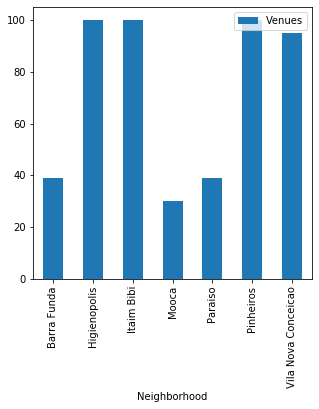

In [14]:
# Higienopolis, Pinheiros, Itabim Bibi and Vila Nova Conceicao got more list of categories.
temp_venue = saopaulo_venues[['Neighborhood', 'Venue']].copy()
temp_venues = temp_venue.groupby(['Neighborhood']).size().reset_index(name='Venues')
temp_venues.plot.bar(x='Neighborhood', y='Venues', rot=90,figsize=(5,5))

In [15]:
# one hot encoding
saopaulo_onehot = pd.get_dummies(saopaulo_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
saopaulo_onehot['Neighborhood'] = saopaulo_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [saopaulo_onehot.columns[-1]] + list(saopaulo_onehot.columns[:-1])
downtown_onehot = saopaulo_onehot[fixed_columns]

saopaulo_onehot.head()

,Acai House,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Baiano Restaurant,Bakery,Bar,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Drugstore,Electronics Store,Empanada Restaurant,Event Space,Fair,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gluten-free Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Mobile Phone Shop,Movie Theater,Music Venue,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Plaza,Polish Restaurant,Portuguese Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Salsa Club,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapiocaria,Tea Room,Tennis Court,Theater,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Paraiso
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paraiso
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paraiso
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paraiso
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Paraiso


In [16]:
saopaulo_grouped = saopaulo_onehot.groupby('Neighborhood').mean().reset_index()
saopaulo_grouped.head()

,Neighborhood,Acai House,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Baiano Restaurant,Bakery,Bar,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Boutique,Brasserie,Brazilian Restaurant,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,Comedy Club,Convenience Store,Cosmetics Shop,Country Dance Club,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dog Run,Drugstore,Electronics Store,Empanada Restaurant,Event Space,Fair,Falafel Restaurant,Farmers Market,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gluten-free Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Mobile Phone Shop,Movie Theater,Music Venue,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Optical Shop,Organic Grocery,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Plaza,Polish Restaurant,Portuguese Restaurant,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Rock Club,Sake Bar,Salon / Barbershop,Salsa Club,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Snack Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tapiocaria,Tea Room,Tennis Court,Theater,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barra Funda,0.000000,0.00,0.0,0.00,0.00,0.0,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.025641,0.025641,0.00,0.102564,0.0,0.00,0.00,0.000000,0.025641,0.0,0.00,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.00,0.025641,0.025641,0.025641,0.0,0.00,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.025641,0.00,0.025641,0.0,0.0,0.0,0.025641,0.025641,0.00,0.000000,0.00,0.025641,0.000000,0.0,0.00,0.00,0.0,0.000000,0.025641,0.025641,0.0,0.025641,0.00,0.000000,0.0,0.0,0.000000,0.025641,0.000000,0.000000,0.000000,0.025641,0.00,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.00,0.00,0.025641,0.00,0.00,0.0,0.102564,0.025641,0.0,0.00,0.00,0.000000,0.0,0.0,0.025641,0.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.025641,0.0,0.0,0.0,0.00,0.025641,0.102564,0.00,0.00,0.025641,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.00,0.025641,0.025641,0.025641,0.000000,0.025641,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.00,0.025641,0.0,0.00,0.0,0.00,0.00
1,Higienopolis,0.000000,0.01,0.0,0.01,0.02,0.0,0.00,0.010000,0.01,0.01,0.050000,0.030000,0.02,0.000000,0.00,0.0,0.010000,0.000000,0.01,0.000000,0.0,0.01,0.00,0.020000,0.040000,0.0,0.01,0.01,0.010000,0.0,0.030000,0.01,0.01,0.000000,0.01,0.010000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.02,0.01,0.01,0.02,0.01,0.00,0.000000,0.01,0.010000,0.0,0.0,0.0,0.020000,0.000000,0.01,0.000000,0.00,0.020000,0.000000,0.0,0.01,0.01,0.0,0.000000,0.020000,0.020000,0.0,0.000000,0.00,0.010000,0.0,0.0,0.000000,0.000000,0.000000,0.010000,0.060000,0.010000,0.03,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.00,0.01,0.01,0.030000,0.00,0.01,0.0,0.000000,0.000000,0.0,0.00,0.00,0.000000,0.0,0.0,0.020000,0.0,0.03,0.020000,0.0,0.01,0.0,0.03,0.010000,0.0,0.0,0.0,0.00,0.000000,0.010000,0.00,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.01,0.0,0.010000,0

In [0]:
# Function for most common venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
saopaulo_venues_sorted = pd.DataFrame(columns=columns)
saopaulo_venues_sorted['Neighborhood'] = saopaulo_grouped['Neighborhood']

for ind in np.arange(saopaulo_grouped.shape[0]):
    saopaulo_venues_sorted.iloc[ind, 1:] = return_most_common_venues(saopaulo_grouped.iloc[ind, :], num_top_venues)

saopaulo_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra Funda,Brazilian Restaurant,Music Venue,Restaurant,Residential Building (Apartment / Condo),Bookstore,Boutique,Farmers Market,Salon / Barbershop,Fair,Café
1,Higienopolis,Italian Restaurant,Bakery,Café,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Jewelry Store,Bar,Pastry Shop,Food & Drink Shop
2,Itaim Bibi,Italian Restaurant,Restaurant,Bar,Japanese Restaurant,Brazilian Restaurant,Burger Joint,Hotel,Coffee Shop,Steakhouse,French Restaurant
3,Mooca,Bar,Pizza Place,Steakhouse,Pet Store,Bakery,Gym / Fitness Center,Farmers Market,Burger Joint,Plaza,Fried Chicken Joint
4,Paraiso,Coffee Shop,Hostel,Middle Eastern Restaurant,Tennis Court,Spa,Hotel,Restaurant,Gym,Nightclub,Music Venue


In [20]:
#Five top venues of neighborhoods
num_top_venues = 5

for hood in saopaulo_bairro['Neighborhood']:
    print("----"+hood+"----")
    temp = saopaulo_grouped[saopaulo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Paraiso----
          venue  freq
0   Coffee Shop  0.08
1        Hostel  0.05
2  Tennis Court  0.05
3           Spa  0.05
4    Restaurant  0.05


----Itaim Bibi----
                  venue  freq
0    Italian Restaurant  0.10
1                   Bar  0.09
2            Restaurant  0.09
3   Japanese Restaurant  0.08
4  Brazilian Restaurant  0.04


----Vila Nova Conceicao----
                    venue  freq
0    Gym / Fitness Center  0.05
1  Furniture / Home Store  0.05
2      Italian Restaurant  0.04
3             Supermarket  0.04
4                  Bakery  0.04


----Barra Funda----
                  venue  freq
0  Brazilian Restaurant  0.10
1           Music Venue  0.10
2            Restaurant  0.10
3    Salon / Barbershop  0.03
4        Hardware Store  0.03


----Higienopolis----
                       venue  freq
0         Italian Restaurant  0.06
1                     Bakery  0.05
2                       Café  0.04
3                Coffee Shop  0.03
4  Middle Eastern Restaurant 

# Clustering (using k-means clustering)

In [21]:
# Creation of three clustering
kclusters = 3

saopaulo_grouped_clustering = saopaulo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(saopaulo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:kclusters]

array([2, 1, 1], dtype=int32)

In [0]:
# add clustering labels
saopaulo_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [0]:
#saopaulo_venues_sorted
saopaulo_merged = saopaulo_bairro

#merge helsinki_grouped with helsinki_data to add latitude/longitude for each neighborhood
saopaulo_merged = saopaulo_merged.join(saopaulo_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



In [24]:
saopaulo_merged.head(10) # check the last columns!

,Neighborhood,Latitude,Longitude,Distance Work,Distance Metro,M2 price rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paraiso,-23.574218,-46.639347,2580,310,46,1,Coffee Shop,Hostel,Middle Eastern Restaurant,Tennis Court,Spa,Hotel,Restaurant,Gym,Nightclub,Music Venue
1,Itaim Bibi,-23.584194,-46.681096,6430,1000,67,1,Italian Restaurant,Restaurant,Bar,Japanese Restaurant,Brazilian Restaurant,Burger Joint,Hotel,Coffee Shop,Steakhouse,French Restaurant
2,Vila Nova Conceicao,-23.596479,-46.668131,6400,1600,68,1,Furniture / Home Store,Gym / Fitness Center,Italian Restaurant,Bakery,Supermarket,Pharmacy,Dessert Shop,Coffee Shop,Café,Organic Grocery
3,Barra Funda,-23.527149,-46.669275,4680,250,33,2,Brazilian Restaurant,Music Venue,Restaurant,Residential Building (Apartment / Condo),Bookstore,Boutique,Farmers Market,Salon / Barbershop,Fair,Café
4,Higienopolis,-23.544800,-46.656316,2660,650,34,1,Italian Restaurant,Bakery,Café,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Jewelry Store,Bar,Pastry Shop,Food & Drink Shop
5,Mooca,-23.549403,-46.594401,3650,1340,26,0,Bar,Pizza Place,Steakhouse,Pet Store,Bakery,Gym / Fitness Center,Farmers Market,Burger Joint,Plaza,Fried Chicken Joint
6,Pinheiros,-23.562716,-46.690196,6240,614,51,1,Bar,Dessert Shop,Farmers Market,Burger Joint,Art Gallery,Pet Store,Vegetarian / Vegan Restaurant,Candy Store,Japanese Restaurant,Gym / Fitness Center


In [25]:
# Cluster 0
saopaulo_merged.Neighborhood[saopaulo_merged['Cluster Labels'] == 0]

5    Mooca
Name: Neighborhood, dtype: object

In [26]:
# Cluster 1
saopaulo_merged.Neighborhood[saopaulo_merged['Cluster Labels'] == 1]

0                Paraiso
1             Itaim Bibi
2    Vila Nova Conceicao
4           Higienopolis
6              Pinheiros
Name: Neighborhood, dtype: object

In [27]:
# Cluster 2
saopaulo_merged.Neighborhood[saopaulo_merged['Cluster Labels'] == 2]

3    Barra Funda
Name: Neighborhood, dtype: object

In [28]:
# create map of Sao Paulo using latitude and longitude values with cluster


kclusters=3
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(saopaulo_merged['Latitude'], saopaulo_merged['Longitude'], saopaulo_merged['Neighborhood'], saopaulo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(saopaulo_venues['Venue Latitude'], saopaulo_venues['Venue Longitude'], saopaulo_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

## Examine a paticular Cluster 

### After examining various cluster data, I concluded that cluster 1 has the best locations in Sao Paulo, providing guidance on where to look for the future apartment.


In [29]:
## 1 is the cluster number to explore

saopaulo_merged.loc[saopaulo_merged['Cluster Labels'] == 1]

,Neighborhood,Latitude,Longitude,Distance Work,Distance Metro,M2 price rent,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paraiso,-23.574218,-46.639347,2580,310,46,1,Coffee Shop,Hostel,Middle Eastern Restaurant,Tennis Court,Spa,Hotel,Restaurant,Gym,Nightclub,Music Venue
1,Itaim Bibi,-23.584194,-46.681096,6430,1000,67,1,Italian Restaurant,Restaurant,Bar,Japanese Restaurant,Brazilian Restaurant,Burger Joint,Hotel,Coffee Shop,Steakhouse,French Restaurant
2,Vila Nova Conceicao,-23.596479,-46.668131,6400,1600,68,1,Furniture / Home Store,Gym / Fitness Center,Italian Restaurant,Bakery,Supermarket,Pharmacy,Dessert Shop,Coffee Shop,Café,Organic Grocery
4,Higienopolis,-23.544800,-46.656316,2660,650,34,1,Italian Restaurant,Bakery,Café,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Jewelry Store,Bar,Pastry Shop,Food & Drink Shop
6,Pinheiros,-23.562716,-46.690196,6240,614,51,1,Bar,Dessert Shop,Farmers Market,Burger Joint,Art Gallery,Pet Store,Vegetarian / Vegan Restaurant,Candy Store,Japanese Restaurant,Gym / Fitness Center


** It will be discarded the locations: Itaim Bibi, Vila Nova Conceicao and Pinhieros due to the price and distance from work and subway.We will work with two locations Paraíso and Higienopolis.**

# Paraíso visual analysis

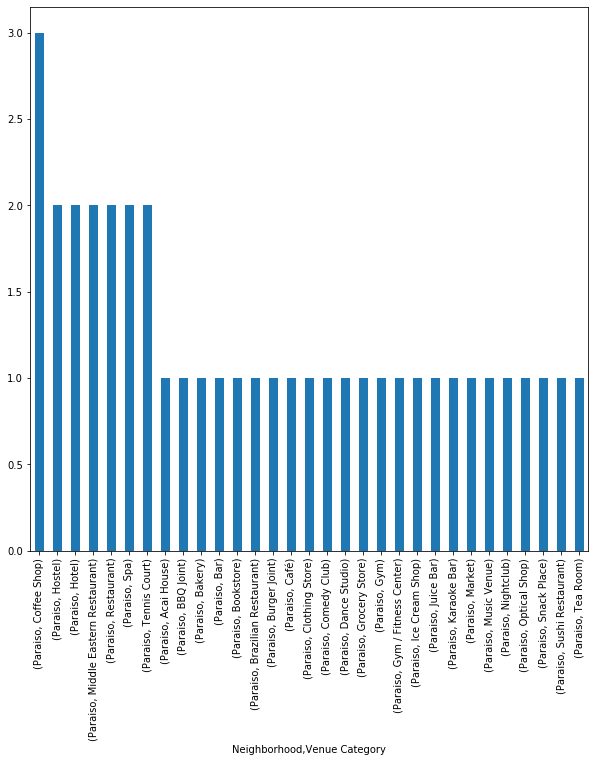

In [31]:
# list of business categories in the Paraíso.
temp_venue = saopaulo_venues[['Neighborhood', 'Venue Category']].copy()
temp_venue = temp_venue[temp_venue.Neighborhood=='Paraiso']
temp_venues = temp_venue.groupby(['Neighborhood'])['Venue Category'].value_counts()
temp_venues.plot.bar(x='Neighborhood', y='Venue Category', rot=90,figsize=(10,10))

In [32]:
temp_venue = saopaulo_venues[['Neighborhood', 'Venue Latitude', 'Venue Longitude', 'Venue']].copy()
temp_venue = temp_venue[temp_venue.Neighborhood=='Paraiso']

latitude = saopaulo_bairro['Latitude'][0]
lontitude = saopaulo_bairro['Longitude'][0] 

# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(temp_venue['Venue Latitude'], temp_venue['Venue Longitude'], temp_venue['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.6,
        parse_html=False).add_to(map_sg)  
    
map_sg

# Higienopolis visual analysis

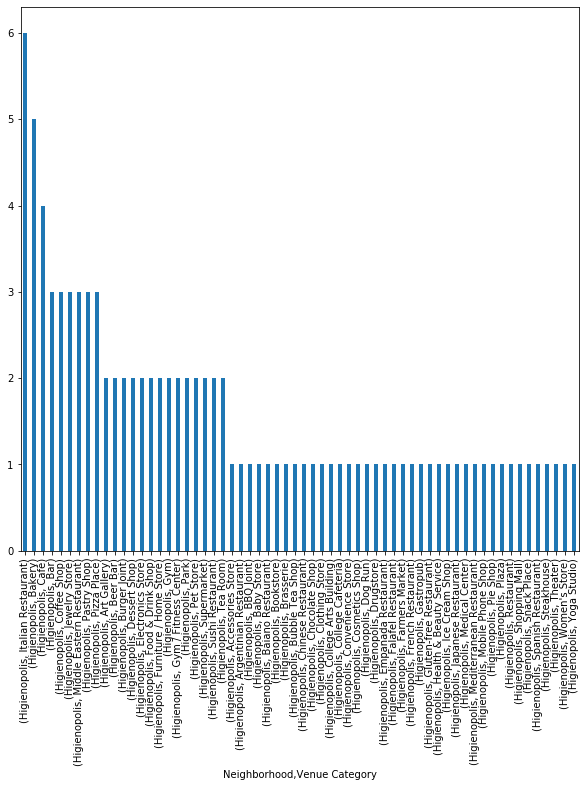

In [34]:
# list of business categories in the Paraíso.
temp_venue = saopaulo_venues[['Neighborhood', 'Venue Category']].copy()
temp_venue = temp_venue[temp_venue.Neighborhood=='Higienopolis']
temp_venues = temp_venue.groupby(['Neighborhood'])['Venue Category'].value_counts()
temp_venues.plot.bar(x='Neighborhood', y='Venue Category', rot=90,figsize=(10,10))

In [35]:
temp_venue = saopaulo_venues[['Neighborhood', 'Venue Latitude', 'Venue Longitude', 'Venue']].copy()
temp_venue = temp_venue[temp_venue.Neighborhood=='Higienopolis']

latitude = saopaulo_bairro['Latitude'][0]
lontitude = saopaulo_bairro['Longitude'][0] 

# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(temp_venue['Venue Latitude'], temp_venue['Venue Longitude'], temp_venue['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#0f0f0f',
        fill_opacity=0.6,
        parse_html=False).add_to(map_sg)  
    
map_sg

# 5. Results and Discussion <a name="results"></a>



 

Seven places were chosen to live in São Paulo. We did a cluster analysis to find similar places. After that, we found that only Paraíso and Higienópolis met the following variables: safe place, distance from work, near the subway, close price and neighborhood facilities.

Which one to choose? Firstly, you should visit these places at varying times and pay attention to the movement of the street, whether it is a more deserted place or there is constant movement of people. Remember that good infrastructure and adequate lighting help to reduce the risk of robbery and exposure to violence.

This work demonstrates that using machine learning techniques will help you choose where to rent, but before renting you should know the place to see the neighborhood yourself to see if it meets your needs.

# 6. Conclusion <a name="conclusion"></a>

The paper presents the use of python language, use of Foursquare API to explore Sao Paulo with machine learning techniques to find a place to rent according to the variables: safe place, distance from work, near the subway, close price and neighborhood facilities. Also, it should be clear that using artificial intelligence will help in choosing, but choosing a property to rent is not an easy task that depends on your lifestyle.